## Example of using FA and CA in ODE model  N2 + 3H2 -> 2 NH3 or N + 3H -> 2A

In [ ]:
$$N_2 + 3H_2 \rightarrow 2 N\!H_3 \, \text{or} \, N + 3H \rightarrow 2A$$\
$$\text{Initial Values:  } F_{N_0}=2 \,mol/s  \:
F_{H_0}=6\, mol/s  \: F_{A_0}=0 \,mol/s$$

$$\frac{dF_N}{dV}=r_N$$
$$\frac{dF_H}{dV}=r_H$$
$$\frac{dF_A}{dV}=r_A$$
$$\color{red}{\frac{dX_N}{dV}=-r_N / F_{N_0}}$$

$$r_N=-kC_NC_H[=]mol/m^3/s$$
$$r_H=3r_N$$
$$r_A=-2r_N$$

$$C_H=\frac{F_H}{flow}$$
$$C_N=\frac{F_N}{flow}$$

$$flow=F_T R T/P$$
$$F_T=F_N+F_A+F_H+F_I$$
$$k=1\times10^{-3}[=]\frac{m^3}{mol N_2 s}$$
The reactor has a volume of $10m^3$ and the values are $T=500$, $P=1\times10^{5}\,Pa$ and $F_I=2\, mol/s$.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

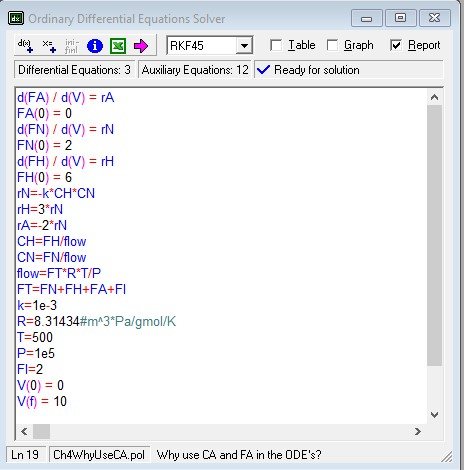

In [4]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
    FN = Yfuncvec[0] 
    FH = Yfuncvec[1]
    FA = Yfuncvec[2]
    X = Yfuncvec[3]
    
    FN0=2
    FH0=6
    k=1e-3
    R=8.31434#m^3*Pa/gmol/K
    T=500
    P=1e5
    FI=2

    FT=FN+FH+FA+FI
    flow=FT*R*T/P
    CH=FH/flow
    CN=FN/flow

    rN=-k*CH*CN
    rH=3*rN
    rA=-2*rN
    
  
    dFNdV= rN #Differential mole balance on nitrogen
    
    dFHdV= rH #Differential mole balance on hydrogen
    
    dFAdV= rA #Differential mole balance on ammonia
                           
    dXdV=-rN/FN0

    
    dYfuncvecdV = [dFNdV,dFHdV, dFAdV, dXdV] 
    return dYfuncvecdV 



In [5]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
F0=[2,6,0,0]# Initial values for the F's and one X
tspan=(0,10)# start and end of the integration

sol=ODEfun(0,F0)#Evaluates the derivatives at V=0L
print (sol)

[-0.06943615707474929, -0.20830847122424787, 0.13887231414949858, 0.034718078537374644]


In [6]:
#test of solve_ivp function (python ODE solver from scipy library)

#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of FA & FB
sol=solve_ivp(ODEfun,tspan,F0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 9.87620527e-03, 1.08638258e-01, 1.09625878e+00,
       1.00000000e+01])
 t_events: None
        y: array([[2.00000000e+00, 1.99931438e+00, 1.99247363e+00, 1.92559623e+00,
        1.43384107e+00],
       [6.00000000e+00, 5.99794313e+00, 5.97742088e+00, 5.77678869e+00,
        4.30152320e+00],
       [0.00000000e+00, 1.37124935e-03, 1.50527473e-02, 1.48807537e-01,
        1.13231786e+00],
       [0.00000000e+00, 3.42812337e-04, 3.76318682e-03, 3.72018843e-02,
        2.83079466e-01]])
 y_events: None


In [7]:
# This prints the values of V.  Notice python uses the generic dy/dt notation for a derivative. 
#The solve_ivp function uses a "variable step size" that it determines based on the complexity of the problem
#The more complex the more steps are needed e.g. smaller step sizes
print(sol.t)

[0.00000000e+00 9.87620527e-03 1.08638258e-01 1.09625878e+00
 1.00000000e+01]


In [8]:
print(sol.y) # This prints the values for FA and FB.  This is based on dy/dt notation where y0 is FA and 
#y1 is FB FA is the list of numbers in the first set of square brackets [] and 
#FB is in the second set of square brackets []

[[2.00000000e+00 1.99931438e+00 1.99247363e+00 1.92559623e+00
  1.43384107e+00]
 [6.00000000e+00 5.99794313e+00 5.97742088e+00 5.77678869e+00
  4.30152320e+00]
 [0.00000000e+00 1.37124935e-03 1.50527473e-02 1.48807537e-01
  1.13231786e+00]
 [0.00000000e+00 3.42812337e-04 3.76318682e-03 3.72018843e-02
  2.83079466e-01]]


In [9]:
# print a table
numrows=20
tspan = (0,10) # Range for the independent variable 
teval=np.linspace(tspan[0],tspan[1],numrows)

y0 = [2,6,0,0] # Initial values for the dependent variables

sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)

print('Solution ')
print('    V         FN         FH        FA     XN')
print('  (m^3)    (mol/s)   (mol/s)    (mol/s)      ')

row=0
for row in range(numrows):
    print('{:4.4f} {:10.4f} {:10.4f} {:10.4f} {:6.3f} '.format(sol.t[row],sol.y[0,row],sol.y[1,row],sol.y[2,row],sol.y[3,row]))

Solution 
    V         FN         FH        FA     XN
  (m^3)    (mol/s)   (mol/s)    (mol/s)      
0.0000     2.0000     6.0000     0.0000  0.000 
0.5263     1.9639     5.8916     0.0723  0.018 
1.0526     1.9285     5.7855     0.1430  0.036 
1.5789     1.8939     5.6817     0.2122  0.053 
2.1053     1.8601     5.5802     0.2799  0.070 
2.6316     1.8270     5.4810     0.3460  0.087 
3.1579     1.7946     5.3839     0.4108  0.103 
3.6842     1.7630     5.2889     0.4740  0.119 
4.2105     1.7320     5.1961     0.5359  0.134 
4.7368     1.7018     5.1053     0.5965  0.149 
5.2632     1.6722     5.0165     0.6556  0.164 
5.7895     1.6432     4.9297     0.7135  0.178 
6.3158     1.6150     4.8449     0.7701  0.193 
6.8421     1.5873     4.7619     0.8254  0.206 
7.3684     1.5603     4.6808     0.8795  0.220 
7.8947     1.5338     4.6015     0.9323  0.233 
8.4211     1.5080     4.5239     0.9840  0.246 
8.9474     1.4827     4.4481     1.0346  0.259 
9.4737     1.4580     4.3740     1.

In [10]:
# print a table with extra values of Concentrations, flowrate, total molar flowrate, reaction rates
numrows=20
tspan = (0,10) # Range for the independent variable 
teval=np.linspace(tspan[0],tspan[1],numrows)

y0 = [2,6,0,0] # Initial values for the dependent variables

sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)

print('Solution ')
print('    V      FN           FH        FA     XN        CN           CH      flowrate      FT        rN')
print('  (m^3)  (mol/s)      (mol/s)    (mol/s)         (mol/m^3)   (mol/m^3)  (m^3/s)     (mol/s)  (mol/m^3/s)')

CN=np.zeros(numrows)
CH=np.zeros(numrows)
flow=np.zeros(numrows)
FT=np.zeros(numrows)
rN=np.zeros(numrows)

FN0=2
FH0=6
k=1e-3
R=8.31434#m^3*Pa/gmol/K
T=500
P=1e5
FI=2
   
row=0
for row in range(numrows):
    FT[row]=sol.y[0,row]+sol.y[1,row]+sol.y[2,row]+FI
    flow[row]=FT[row]*R*T/P
    CN[row]=sol.y[0,row]/flow[row]
    CH[row]=sol.y[1,row]/flow[row]
    rN[row]=-k*CH[row]*CN[row]
    print('{:6.2f} {:10.4f} {:10.4f} {:10.4f} {:6.3f}    {:4.4f}   {:10.4f} {:10.4f} {:10.4f}  {:6.4f} '.format(sol.t[row],sol.y[0,row],sol.y[1,row],sol.y[2,row],
                                                               sol.y[3,row],CN[row],CH[row],flow[row],FT[row],rN[row]))

Solution 
    V      FN           FH        FA     XN        CN           CH      flowrate      FT        rN
  (m^3)  (mol/s)      (mol/s)    (mol/s)         (mol/m^3)   (mol/m^3)  (m^3/s)     (mol/s)  (mol/m^3/s)
  0.00     2.0000     6.0000     0.0000  0.000    4.8110      14.4329     0.4157    10.0000  -0.0694 
  0.53     1.9639     5.8916     0.0723  0.018    4.7584      14.2752     0.4127     9.9277  -0.0679 
  1.05     1.9285     5.7855     0.1430  0.036    4.7063      14.1188     0.4098     9.8570  -0.0664 
  1.58     1.8939     5.6817     0.2122  0.053    4.6545      13.9636     0.4069     9.7878  -0.0650 
  2.11     1.8601     5.5802     0.2799  0.070    4.6032      13.8096     0.4041     9.7201  -0.0636 
  2.63     1.8270     5.4810     0.3460  0.087    4.5523      13.6569     0.4013     9.6540  -0.0622 
  3.16     1.7946     5.3839     0.4108  0.103    4.5019      13.5056     0.3986     9.5892  -0.0608 
  3.68     1.7630     5.2889     0.4740  0.119    4.4519      13.3556   

Text(0, 0.5, 'Reactor Volume ($m^3$)')

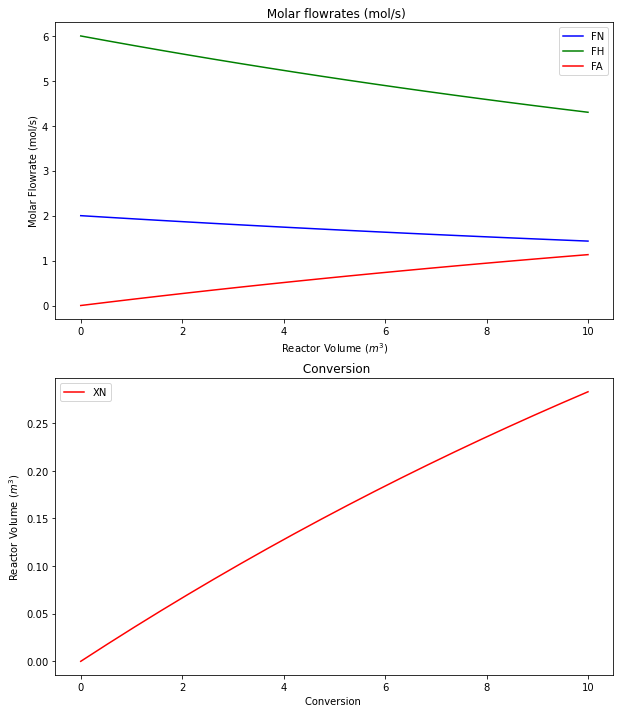

In [11]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FN')
plt.plot(sol.t,sol.y[1],'g',label='FH')
plt.plot(sol.t,sol.y[2],'r',label='FA')

plt.legend()
plt.title(' Molar flowrates (mol/s)')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate (mol/s)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'r',label='XN')

plt.legend()
plt.title(' Conversion')
plt.xlabel('Conversion ')
plt.ylabel('Reactor Volume ($m^3$)')

Text(0, 0.5, 'Reaction Rate, -rN ($mol//m^3/s$)')

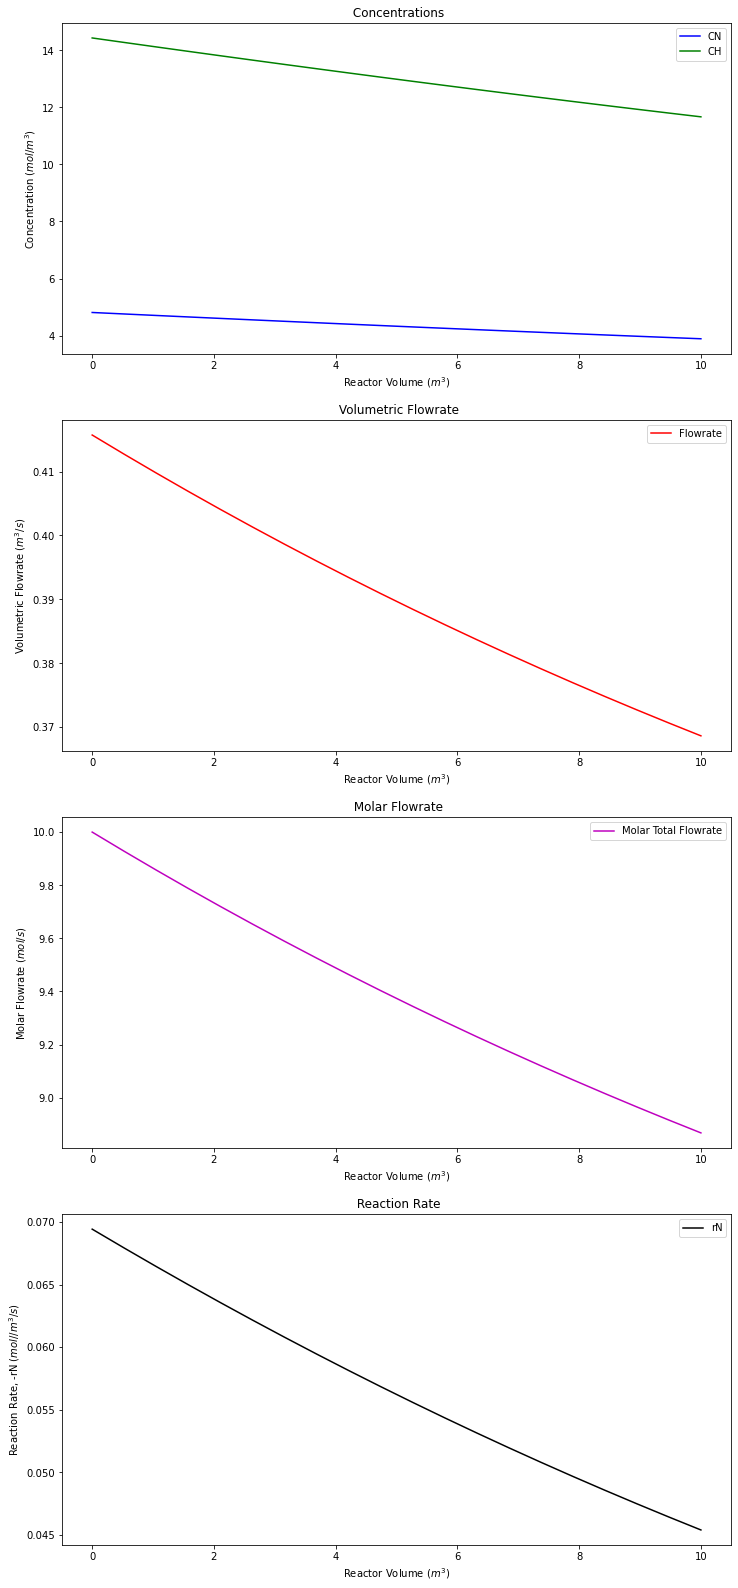

In [12]:
#print graphs of concentrations, flowrates, FT, and rN
plt.figure(figsize=(12,28))

plt.subplot (4,1,1)
plt.plot(sol.t,CN,'b',label='CN')
plt.plot(sol.t,CH,'g',label='CH')


plt.legend()
plt.title(' Concentrations')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Concentration ($mol/m^3$)')

plt.subplot (4,1,2)
plt.plot(sol.t,flow,'r',label='Flowrate')

plt.legend()
plt.title(' Volumetric Flowrate')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Volumetric Flowrate ($m^3/s$)')

plt.subplot (4,1,3)
plt.plot(sol.t,FT,'m',label='Molar Total Flowrate')

plt.legend()
plt.title(' Molar Flowrate')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate ($mol/s$)')

plt.subplot (4,1,4)
plt.plot(sol.t,-rN,'k',label='rN')

plt.legend()
plt.title(' Reaction Rate')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Reaction Rate, -rN ($mol//m^3/s$)')